In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# Data

In [2]:
df = pd.read_csv('/Users/beyazituysal/Documents/PythonProjects/MLalgorithm/datasets/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
#null check
df.isnull().sum()/len(df)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

# EDA

## Box Plot

<AxesSubplot: xlabel='Outcome', ylabel='Age'>

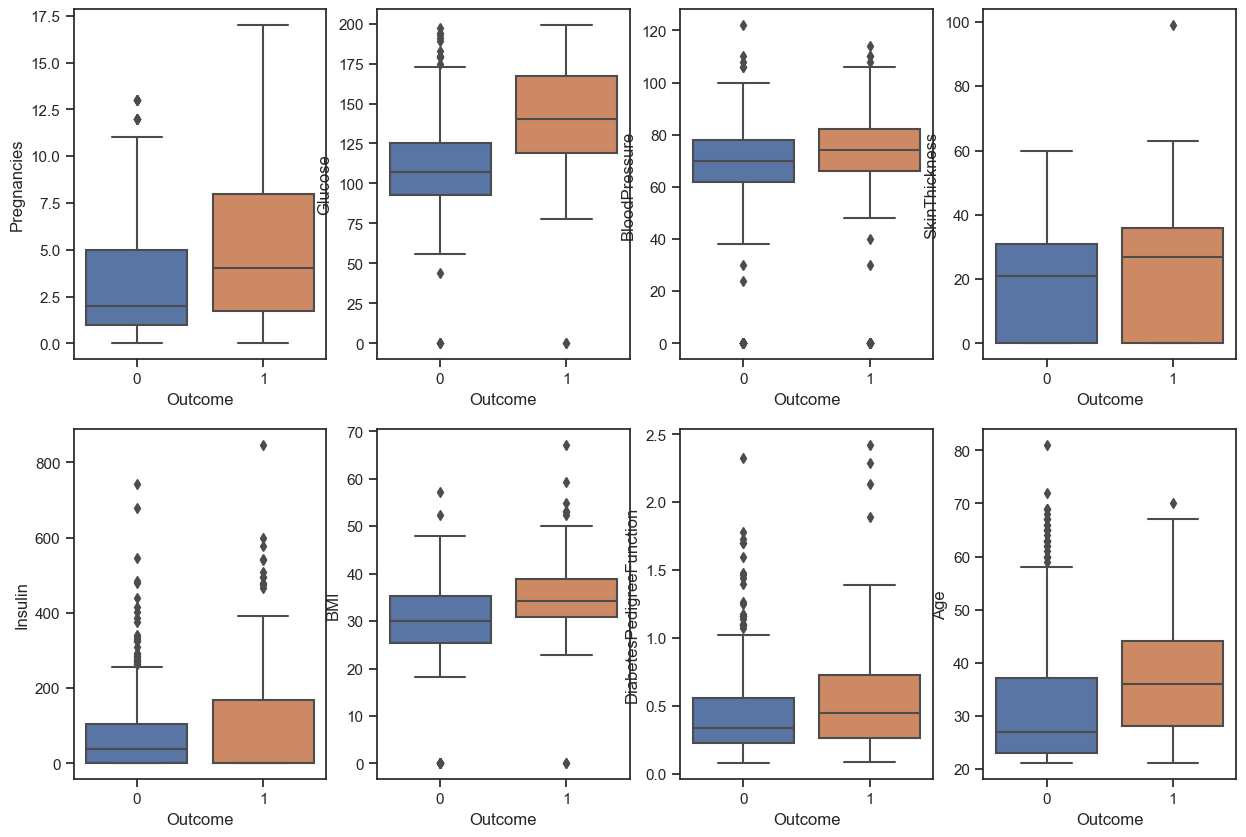

In [9]:
sns.set(style='ticks')
plt.figure(figsize=(15,10))
plt.subplot(2,4,1)
sns.boxplot(x='Outcome', y='Pregnancies', data=df)
plt.subplot(2,4,2)
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.subplot(2,4,3)
sns.boxplot(x='Outcome', y='BloodPressure', data=df)
plt.subplot(2,4,4)
sns.boxplot(x='Outcome', y='SkinThickness', data=df)
plt.subplot(2,4,5)
sns.boxplot(x='Outcome', y='Insulin', data=df)
plt.subplot(2,4,6)
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.subplot(2,4,7)
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df)
plt.subplot(2,4,8)
sns.boxplot(x='Outcome', y='Age', data=df)

## Violin Plot

<AxesSubplot: xlabel='Outcome', ylabel='Age'>

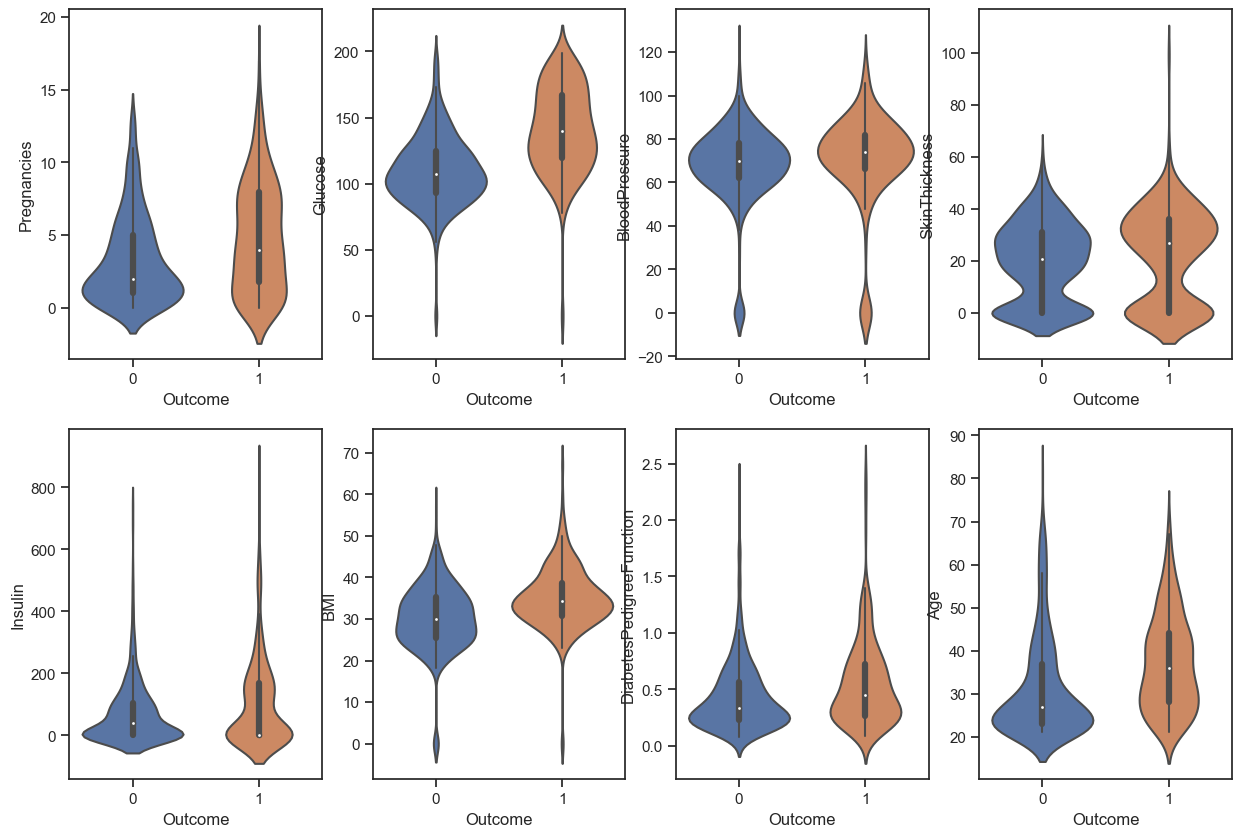

In [13]:
sns.set(style='ticks')
plt.figure(figsize=(15,10))
plt.subplot(2,4,1)
sns.violinplot(x='Outcome', y='Pregnancies', data=df)
plt.subplot(2,4,2)
sns.violinplot(x='Outcome', y='Glucose', data=df)
plt.subplot(2,4,3)
sns.violinplot(x='Outcome', y='BloodPressure', data=df)
plt.subplot(2,4,4)
sns.violinplot(x='Outcome', y='SkinThickness', data=df)
plt.subplot(2,4,5)
sns.violinplot(x='Outcome', y='Insulin', data=df)
plt.subplot(2,4,6)
sns.violinplot(x='Outcome', y='BMI', data=df)
plt.subplot(2,4,7)
sns.violinplot(x='Outcome', y='DiabetesPedigreeFunction', data=df)
plt.subplot(2,4,8)
sns.violinplot(x='Outcome', y='Age', data=df)

In [18]:
# rename the DiabetesPedigreeFunction column, becaouse name is too long
df.rename(columns = {'DiabetesPedigreeFunction':'DPF'}, inplace = True)

[]

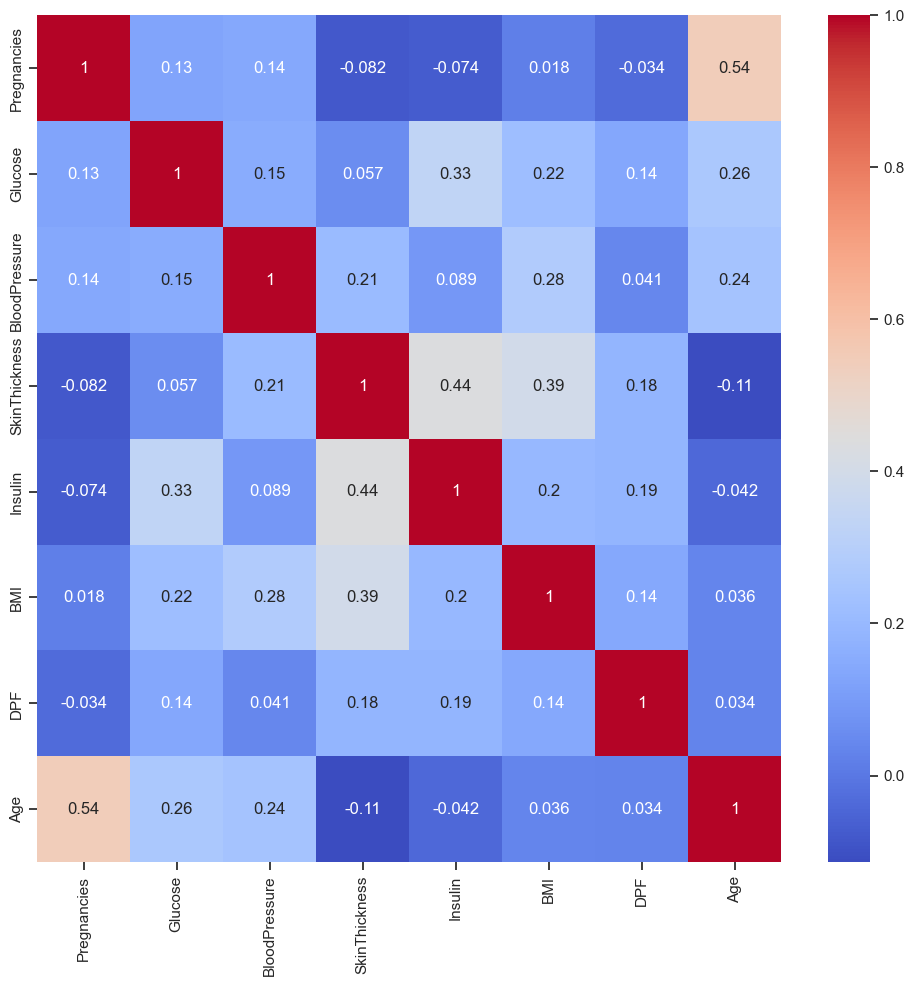

In [19]:
df_without_output = df.drop(['Outcome'], axis=1)
plt.figure(figsize=(12,11))
sns.heatmap(df_without_output.corr(), annot=True, cmap='coolwarm')
plt.plot()

<AxesSubplot: title={'center': 'Age and Pregnancies'}, xlabel='Age', ylabel='Pregnancies'>

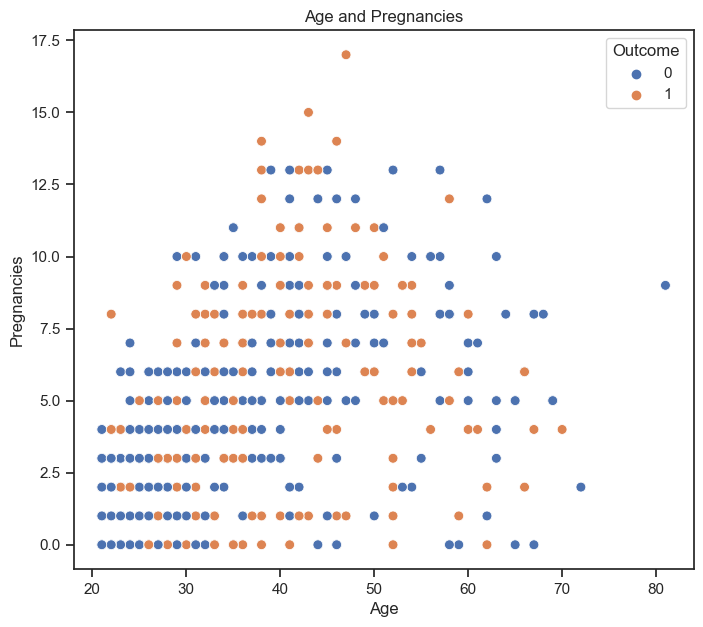

In [22]:
plt.figure(figsize=(8,7))
plt.title('Age and Pregnancies')
sns.scatterplot(data=df,x='Age',y='Pregnancies',hue='Outcome',s=50)

<AxesSubplot: title={'center': 'Insulin and Skin Thickness'}, xlabel='Insulin', ylabel='SkinThickness'>

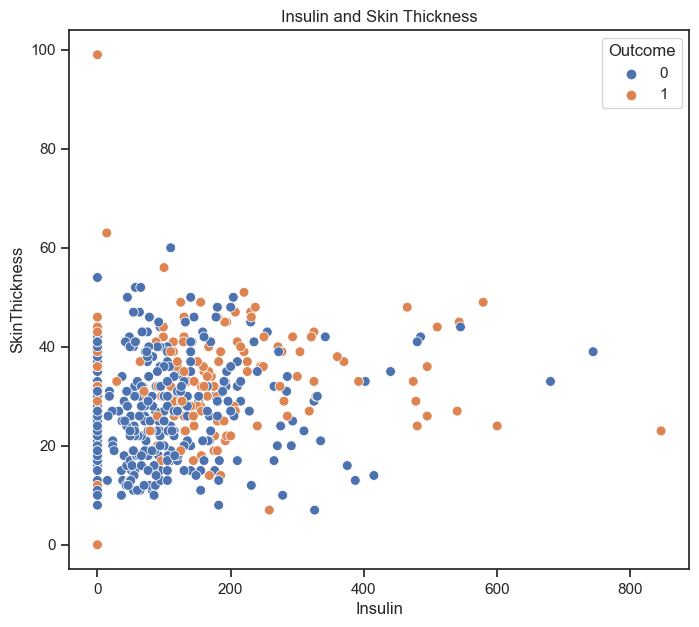

In [25]:
plt.figure(figsize=(8,7))
plt.title('Insulin and Skin Thickness')
sns.scatterplot(data=df,x='Insulin',y='SkinThickness',hue='Outcome',s=50)

<AxesSubplot: title={'center': 'BMI and Skin Thickness'}, xlabel='BMI', ylabel='SkinThickness'>

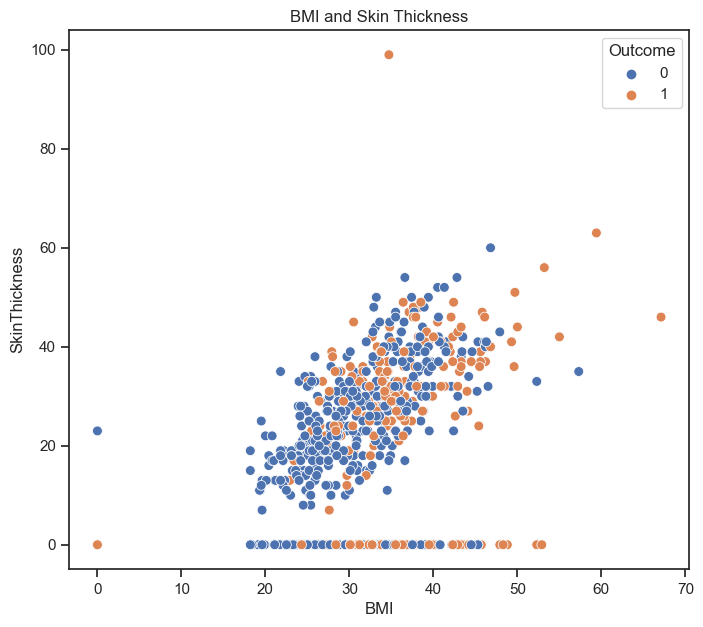

In [26]:
plt.figure(figsize=(8,7))
plt.title('BMI and Skin Thickness')
sns.scatterplot(data=df,x='BMI',y='SkinThickness',hue='Outcome',s=50)

## Uni-Variate Analysis

In [29]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DPF', 'Age', 'Outcome'],
      dtype='object')

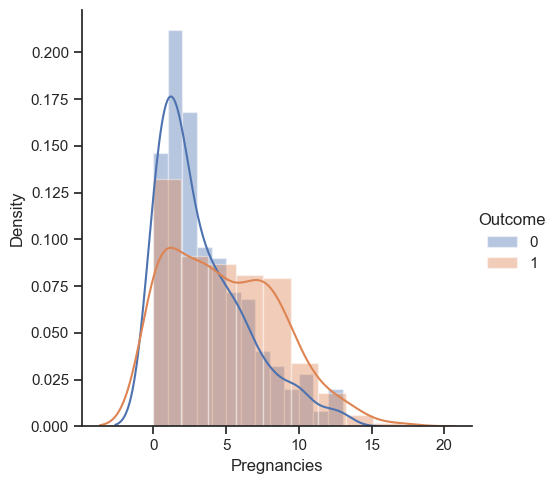

In [27]:
sns.FacetGrid(df, hue='Outcome', height=5).map(sns.distplot,'Pregnancies').add_legend();

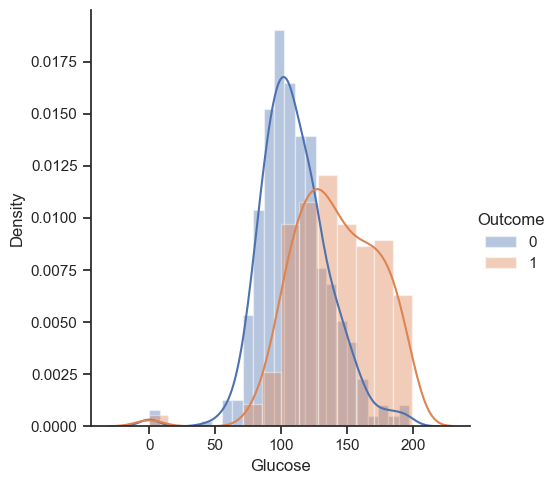

In [30]:
sns.FacetGrid(df, hue='Outcome', height=5).map(sns.distplot,'Glucose').add_legend();

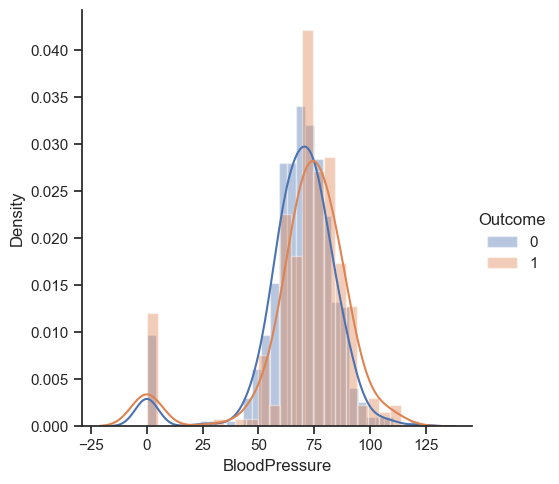

In [31]:
sns.FacetGrid(df, hue='Outcome', height=5).map(sns.distplot,'BloodPressure').add_legend();

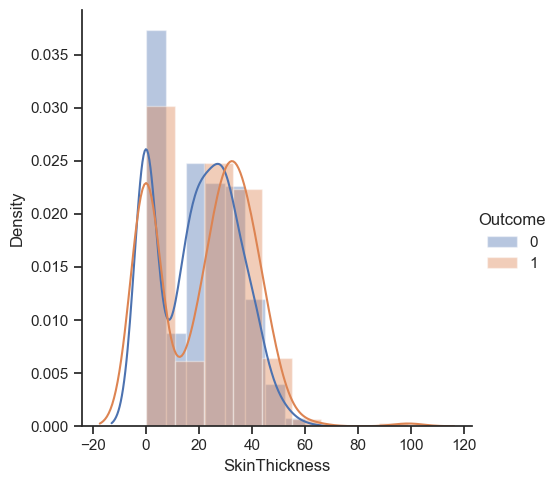

In [32]:
sns.FacetGrid(df, hue='Outcome', height=5).map(sns.distplot,'SkinThickness').add_legend();

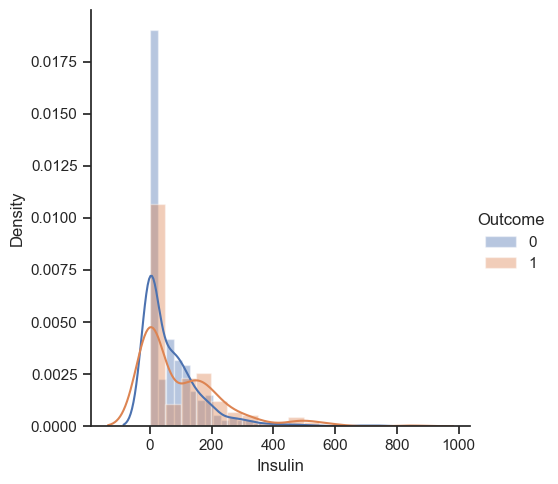

In [33]:
sns.FacetGrid(df, hue='Outcome', height=5).map(sns.distplot,'Insulin').add_legend();

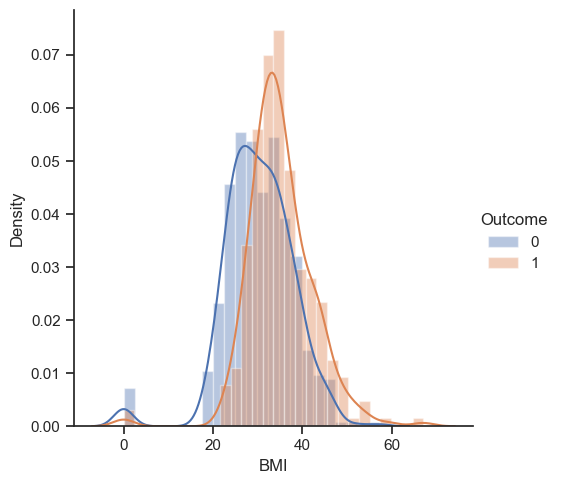

In [34]:
sns.FacetGrid(df, hue='Outcome', height=5).map(sns.distplot,'BMI').add_legend();

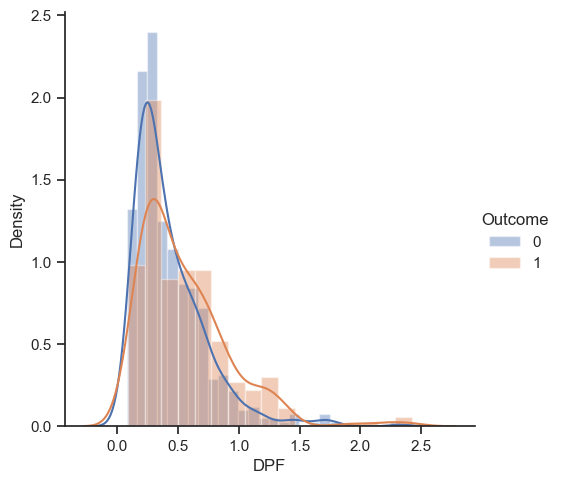

In [35]:
sns.FacetGrid(df, hue='Outcome', height=5).map(sns.distplot,'DPF').add_legend();

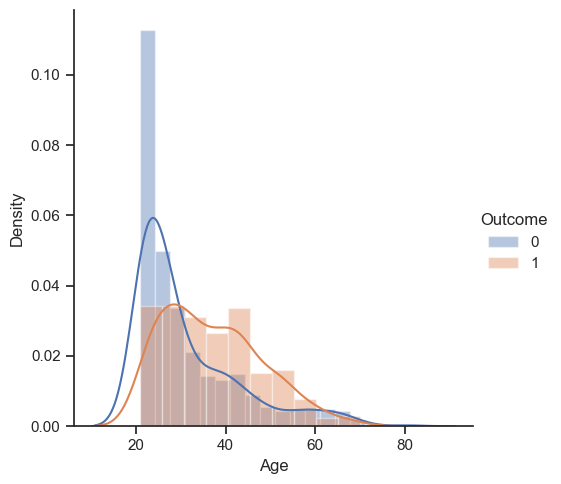

In [36]:
sns.FacetGrid(df, hue='Outcome', height=5).map(sns.distplot,'Age').add_legend();